In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
data = np.load('intrinsics.npz')
Lcam = data["Lcam"]
print(Lcam)

[[ 2.12949203e+03  1.55132281e+02  8.20439554e+01  1.41050036e+04]
 [-1.55062713e+02  2.13326434e+03  9.83929178e+01  6.94311769e+03]
 [ 5.47928716e-02 -2.09287937e-02  9.98278381e-01  9.97801819e+01]]


In [ ]:

Lcam = np.array([[ 2.12949203e+03  1.55132281e+02  8.20439554e+01  1.41050036e+04]
 [-1.55062713e+02  2.13326434e+03  9.83929178e+01  6.94311769e+03]
 [ 5.47928716e-02 -2.09287937e-02  9.98278381e-01  9.97801819e+01]])


In [8]:
grid_counts = (7, 9)
# grid_lengths = (7., 9.)
side_lengths = (7.4/8, 9.7/11)
# side_lengths = (grid_lengths[0]/grid_counts[0], grid_lengths[1]/grid_counts[1])

def pxl_to_board(px, py, Z=0):
    X = np.linalg.inv(np.hstack((Lcam[:,0:2] ,np.array([[-1*px],[-1*py],[-1]])))).dot((-Z*Lcam[:,2]-Lcam[:,3]))
    return X[:2]

center_board = pxl_to_board(0,0)

def pxl_to_pose(px, py):
    X = pxl_to_board(px, py) - center_board
#     X = np.linalg.inv(np.hstack((Lcam[:,0:2] ,np.array([[-1*px],[-1*py],[-1]])))).dot((-Z*Lcam[:,2]-Lcam[:,3]))
    return [X[0]*side_lengths[0], X[1]*side_lengths[1]]


In [10]:
pxl_to_pose(1,0)

[0.0429980770910829, 0.002979538857407858]

In [18]:
resolution = (400, 252)
x_res = resolution[0]

# translations = []
height = 0.3
x_pxls = np.arange(x_res)
x_meters = [pxl_to_pose(px, 0)[0] for px in x_pxls]
angles = [np.arctan2(x_meter, height) for x_meter in x_meters]

# np.interp 

def x_pxl_to_angle(x_pxl):
    return angles[x_pxl]


In [20]:
angles

[0.0,
 0.1423574094586247,
 0.279174686381644,
 0.40609989145090397,
 0.5205937516447616,
 0.6218502466601928,
 0.710310415017349,
 0.7871143556107827,
 0.8536792731037863,
 0.9114399447578392,
 0.9617169829916951,
 1.005665676566419,
 1.044268577244761,
 1.0783486103686581,
 1.1085898068126991,
 1.1355591843595871,
 1.1597269022745105,
 1.1814836712966528,
 1.201155289458728,
 1.219014553569882,
 1.2352909233708063,
 1.2501783257288037,
 1.2638414483346418,
 1.2764208193281699,
 1.2880369161060434,
 1.2987934992455366,
 1.308780327731791,
 1.3180753793255764,
 1.3267466740478473,
 1.3348537782947663,
 1.3424490509934686,
 1.3495786805658847,
 1.3562835515447147,
 1.3625999718885102,
 1.3685602859035717,
 1.3741933928332741,
 1.3795251873363727,
 1.3845789350244841,
 1.389375593794809,
 1.3939340897449157,
 1.3982715548894986,
 1.402403532634499,
 1.406344155939593,
 1.4101063022669567,
 1.413701728734184,
 1.4171411903320466,
 1.420434543609604,
 1.4235908378510562,
 1.426618395455614

In [21]:
x_meters

[0.0,
 0.0429980770910829,
 0.08599829424596005,
 0.12900065162440363,
 0.17200514938620728,
 0.2150117876911744,
 0.25802056669912815,
 0.3010314865699048,
 0.344044547463358,
 0.38705974953936173,
 0.4300770929577934,
 0.47309657787856246,
 0.5161182044615816,
 0.5591419728667866,
 0.6021678832541236,
 0.6451959357835615,
 0.6882261306150769,
 0.731258467908672,
 0.7742929478243559,
 0.8173295705221568,
 0.8603683361621232,
 0.9034092449043147,
 0.9464522969088053,
 0.9894974923356906,
 1.0325448313450782,
 1.0755943140970927,
 1.1186459407518727,
 1.1616997114695768,
 1.204755626410377,
 1.2478136857344615,
 1.2908738896020335,
 1.3339362381733142,
 1.3770007316085413,
 1.4200673700679636,
 1.463136153711854,
 1.5062070827004885,
 1.5492801571941766,
 1.5923553773532286,
 1.6354327433379778,
 1.6785122553087701,
 1.721593913425974,
 1.764677717849968,
 1.8077636687411445,
 1.8508517662599178,
 1.8939420105667175,
 1.9370344018219847,
 1.9801289401861806,
 2.02322562581978,
 2.066324

In [ ]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

grid_size
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
image_file = 'checkerboard.png'
img = cv.imread(fname)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

In [4]:

CHECKERBOARD = (7,9)


# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# Vector for 3D points
obj_points = []

# Vector for 2D points
img_points = []


#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)

 
filename = "cc.png"
image = cv2.imread(filename)
grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find the chess board corners
# If desired number of corners are
# found in the image then ret = true
ret, corners = cv2.findChessboardCorners(
                grayColor, CHECKERBOARD,
                cv2.CALIB_CB_ADAPTIVE_THRESH
                + cv2.CALIB_CB_FAST_CHECK +
                cv2.CALIB_CB_NORMALIZE_IMAGE)

# If desired number of corners can be detected then,
# refine the pixel coordinates and display
# them on the images of checker board
if ret == True:
    obj_points.append(objectp3d)

    # Refining pixel coordinates
    # for given 2d points.
    corners2 = cv2.cornerSubPix(
        grayColor, corners, (11, 11), (-1, -1), criteria)

    img_points.append(corners2)

    # Draw and display the corners
    image = cv2.drawChessboardCorners(image,
                                        CHECKERBOARD,
                                        corners2, ret)
else:
    print("Failed")

# cv2.imshow('img', image)
# cv2.waitKey(0)

# cv2.destroyAllWindows()

In [33]:
Lcam = np.array([
    [ 2.12949203e+03, 1.55132281e+02, 8.20439554e+01, 1.41050036e+04],
    [-1.55062713e+02, 2.13326434e+03, 9.83929178e+01, 6.94311769e+03],
    [ 5.47928716e-02,-2.09287937e-02, 9.98278381e-01, 9.97801819e+01]])
inches_per_meter = 39.37
side_lengths = ((7.4/inches_per_meter)/8, (9.7/inches_per_meter)/11)
x_res, y_res = 400, 252

def pxl_to_board(px, py, Z=0):
    X = np.linalg.inv(np.hstack((Lcam[:,0:2] ,np.array([[-1*px],[-1*py],[-1]])))).dot((-Z*Lcam[:,2]-Lcam[:,3]))
    return X[:2]

center = (x_res/2,y_res/2)
center_board = pxl_to_board(*center)
def pxl_to_pose(px, py):
    """ returns meters offset from camera to ball """
    X = pxl_to_board(px, py) - center_board
    return [X[1]*side_lengths[1], X[0]*side_lengths[0]]

In [30]:
image.shape

(252, 400, 3)

In [34]:
print(center)
print(pxl_to_board(*center))
print(pxl_to_pose(*center))

(200.0, 126.0)
[2.54909955 2.82880771]
[0.0, 0.0]


In [35]:
pxl_to_board(142, 71), pxl_to_pose(142, 71)

(array([0.02499156, 0.06803967]),
 [-0.061836308123908695, -0.059304035914245164])

In [36]:
pxl_to_board(283, 234), pxl_to_pose(283, 234)

(array([6.06454999, 8.14886332]), [0.11915981121915949, 0.08259567328233815])

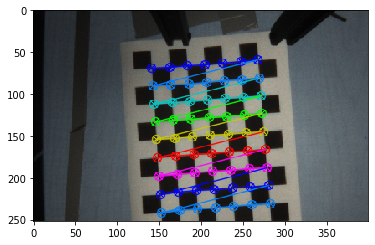

In [6]:
plt.imshow(image)

In [3]:
import numpy as np
import cv2

CHECKERBOARD = (6, 9)


# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# Vector for 3D points
obj_points = []

# Vector for 2D points
img_points = []


#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)

 
filename = "cc.png"
image = cv2.imread(filename)
grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find the chess board corners
# If desired number of corners are
# found in the image then ret = true
ret, corners = cv2.findChessboardCorners(
                grayColor, CHECKERBOARD,
                cv2.CALIB_CB_ADAPTIVE_THRESH
                + cv2.CALIB_CB_FAST_CHECK +
                cv2.CALIB_CB_NORMALIZE_IMAGE)

# If desired number of corners can be detected then,
# refine the pixel coordinates and display
# them on the images of checker board
if ret == True:
    obj_points.append(objectp3d)

    # Refining pixel coordinates
    # for given 2d points.
    corners2 = cv2.cornerSubPix(
        grayColor, corners, (11, 11), (-1, -1), criteria)

    img_points.append(corners2)

    # Draw and display the corners
    image = cv2.drawChessboardCorners(image,
                                        CHECKERBOARD,
                                        corners2, ret)
else:
    print("Failed")

# cv2.imshow('img', image)
# cv2.waitKey(0)

# cv2.destroyAllWindows()

ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    obj_points, img_points, grayColor.shape[::-1], None, None)

Lcam = matrix.dot(np.hstack((cv2.Rodrigues(r_vecs[0])[0],t_vecs[0])))

np.save("intrinsics_2.npy",
    ret=ret, matrix=matrix, distortion=distortion,
    r_vecs=r_vecs, t_vecs=t_vecs, Lcam=Lcam,
    obj_points=obj_points, img_points=img_points)

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'
